In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta
import tpqoa


In [21]:
# Import data to use in Prophet
data = pd.read_csv('./data/EUR_USD_H1_2014_2024_M.csv', 
                   parse_dates = ['time'], index_col = 'time', 
                  #  usecols = ['time', 'c'])
                   usecols = ['time', 'o', 'h', 'l', 'c', 'volume'])

In [22]:
# Adding indicators
data['RSI']=ta.rsi(data['c'])
data['EMAF']=ta.ema(data['c'], length=20)
data['EMAM']=ta.ema(data['c'], length=100)
data['EMAS']=ta.ema(data['c'], length=150)
# data['BB'] = ta.bbands(data['c'])
data['ATR'] = ta.atr(data['h'], data['l'], data['c'])

# Label target co, direction
data['Target'] = data['c'] - data['o']
data['Target'] = data['Target'].shift(-1)
data['TargetDirection'] = np.where(data['Target'] > 0, 1, 0)
data['TargetNextClose'] = data['c'].shift(-1)

data.dropna(inplace=True)
# data.reset_index(inplace=True)

In [23]:
data_set = data
# data_set = data.iloc[:, 3:]
data_set.head(20)

,o,h,l,c,volume,RSI,EMAF,EMAM,EMAS,ATR,Target,TargetDirection,TargetNextClose
time,,,,,,,,,,,,,
2014-01-10 03:00:00,1.36106,1.36138,1.36082,1.36116,847,58.803537,1.359959,1.361290,1.362724,0.001404,0.00014,1,1.36128
2014-01-10 04:00:00,1.36114,1.36161,1.36073,1.36128,1039,59.449902,1.360085,1.361290,1.362705,0.001367,0.00011,1,1.36141
2014-01-10 05:00:00,1.36130,1.36144,1.36087,1.36141,826,60.178821,1.360211,1.361292,1.362688,0.001310,-0.00038,0,1.36102
2014-01-10 06:00:00,1.36140,1.36198,1.36094,1.36102,1340,56.875733,1.360288,1.361287,1.362666,0.001291,0.00023,1,1.36124
2014-01-10 07:00:00,1.36101,1.36158,1.36051,1.36124,2037,58.267274,1.360378,1.361286,1.362647,0.001275,-0.00066,0,1.36058
2014-01-10 08:00:00,1.36124,1.36138,1.36007,1.36058,3019,52.766331,1.360398,1.361272,1.362619,0.001277,-0.00078,0,1.35982
2014-01-10 09:00:00,1.36060,1.36073,1.35938,1.35982,3049,47.236128,1.360343,1.361243,1.362582,0.001283,-0.00077,0,1.35906
2014-01-10 10:00:00,1.35983,1.36003,1.35886,1.35906,2364,42.445421,1.360221,1.361200,1.362536,0.001275,0.00054,1,1.35960
2014-01-10 11:00:00,1.35906,1.36006,1.35896,1.35960,2407,46.590286,1.360161,1.361168,1.362497,0.001262,-0.00065,0,1.35899


In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
data_set_scaled

array([[0.92029117, 0.91434371, 0.92281545, ..., 0.5719603 , 1.        ,
        0.92079208],
       [0.92047201, 0.91486243, 0.92261149, ..., 0.57121588, 1.        ,
        0.92108594],
       [0.92083371, 0.91447903, 0.92292875, ..., 0.55905707, 0.        ,
        0.92020435],
       ...,
       [0.24834976, 0.24465494, 0.24956943, ..., 0.56526055, 0.        ,
        0.24786383],
       [0.2481237 , 0.24330176, 0.24877629, ..., 0.60496278, 1.        ,
        0.25102853],
       [0.24767158, 0.24632386, 0.24893492, ..., 0.55955335, 0.        ,
        0.25019214]])

In [25]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 24
print(data_set_scaled.shape[0])
for j in range(4):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-2])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# print(X)
print(X.shape)
# print(y)
print(y.shape)

63790
(63766, 24, 4)
(63766, 1)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, shuffle=False)

In [27]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, Bidirectional
import numpy as np
#tf.random.set_seed(20)
# np.random.seed(10)

# lstm_input = Input(shape=(backcandles, 4), name='lstm_input')
# inputs = LSTM(256, name='first_layer')(lstm_input)
# inputs = Dense(10, name='dense_layer')(inputs)
# output = Activation('relu', name='output')(inputs)
# model = Model(inputs=lstm_input, outputs=output)
# adam = optimizers.Adam()
# optimizer = keras.optimizers.Nadam(learning_rate=1e-3)
model = Sequential([
    LSTM(256, input_shape=(backcandles, 4), name='first_layer'),
    # Dense(10, name='dense_layer'),
    # Activation('relu', name='output')
    # Bidirectional(LSTM(50, return_sequences=True), input_shape=(backcandles, 4)),
    # Dense(10, activation='relu'),
    Dense(1, activation='sigmoid'),
])
optimizer = keras.optimizers.Nadam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])
model.fit(x=X_train, y=y_train, batch_size=15, epochs=20, shuffle=True, validation_split = 0.2)

Epoch 1/20


/home/pham_dinh_vu/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2268/2268 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 0.5107 - loss: 0.6936 - val_accuracy: 0.4987 - val_loss: 0.6932
Epoch 2/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 0.5006 - loss: 0.6933 - val_accuracy: 0.4987 - val_loss: 0.6932
Epoch 3/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 0.5077 - loss: 0.6932 - val_accuracy: 0.4987 - val_loss: 0.6932
Epoch 4/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 0.5032 - loss: 0.6932 - val_accuracy: 0.5013 - val_loss: 0.6932
Epoch 5/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 0.4989 - loss: 0.6932 - val_accuracy: 0.4988 - val_loss: 0.6931
Epoch 6/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 0.5012 - loss: 0.6932 - val_accuracy: 0.4981 - val_loss: 0.6931
Epoch 7/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 0.4964 - loss: 0.6932 - val_accuracy: 0.4987 - val_loss: 0.6933
Epoch 8/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 60s 26ms/step - accuracy: 0.5009 - loss: 0.69

In [28]:
y_pred = model.predict(X_test)

for i in range(10):
    print(y_pred[i], y_test[i])

665/665 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step
[0.49378696] [1.]
[0.49378037] [0.]
[0.49377522] [0.]
[0.49378473] [1.]
[0.49379182] [1.]
[0.49379537] [1.]
[0.49378657] [1.]
[0.49378404] [0.]
[0.49376982] [1.]
[0.49375492] [0.]


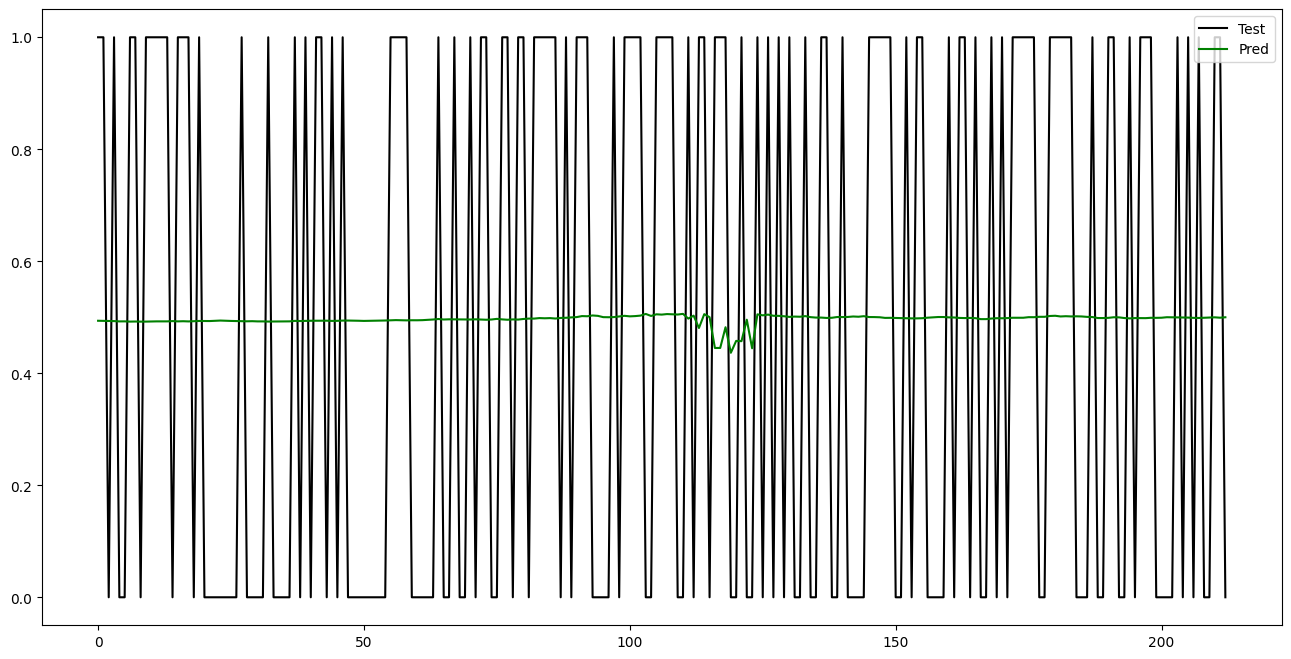

In [29]:
plt.figure(figsize=(16,8))
plt.plot(y_test[::100], color = 'black', label = 'Test')
plt.plot(y_pred[::100], color = 'green', label = 'Pred')
plt.legend()
plt.show()